In [ ]:
%load_ext autoreload
%autoreload 2

from src.es.request_body import RequestBody
from src.pipeline.timeseries import PipelineMessageTimeHistograms, PipelineRuns, hist_count_results
from elasticsearch import Elasticsearch
import json
import frame.frame_collection_stats as fcs

client = Elasticsearch("http://localhost:9200/", api_key="WGRuTF9wUUIzYVpjeXh5Wnl2RlA6Q3ZPUFJoZXRUX1NiX3NWQ0FGbHZEdw==")

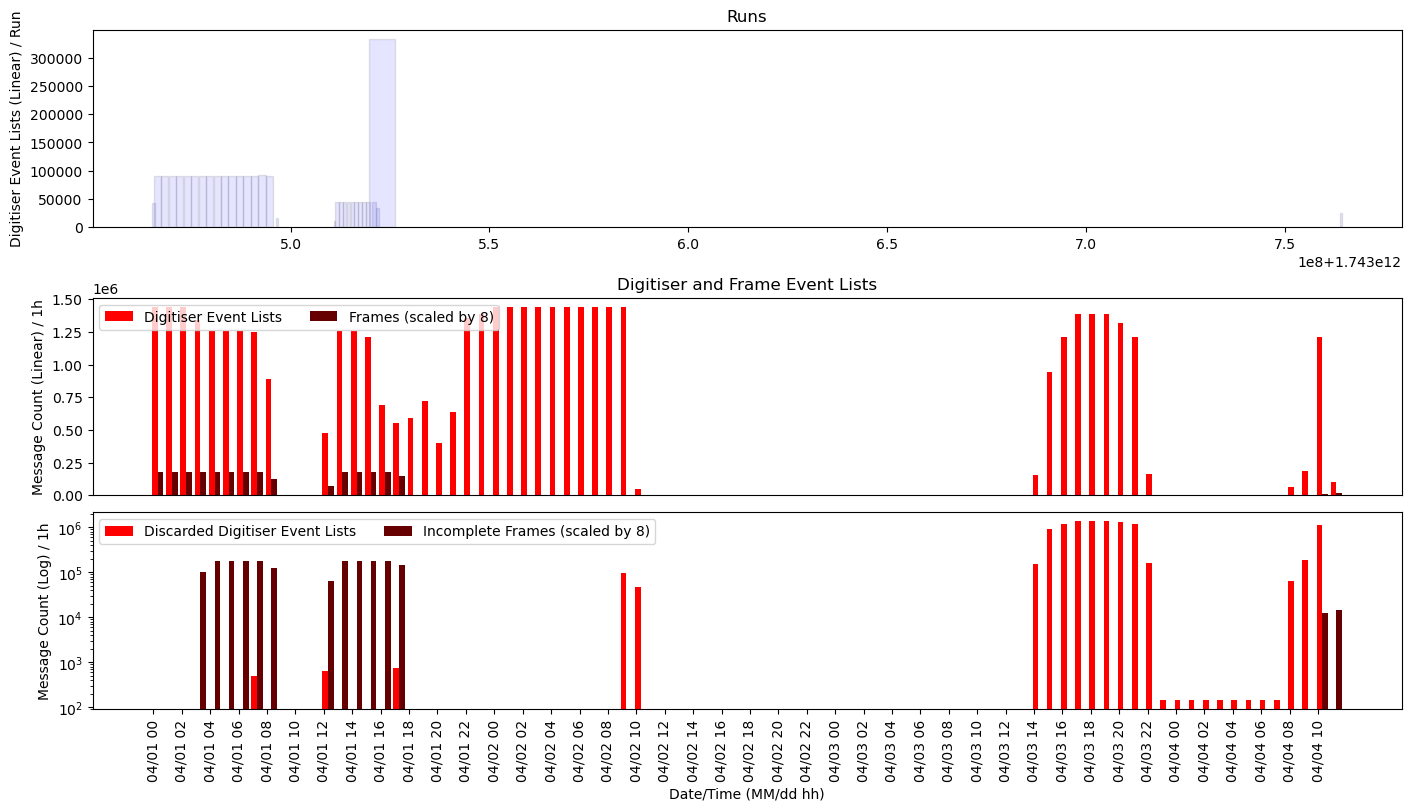

In [34]:

#Coarse Analysis
format = "MM/dd hh"
bin_width = "1h"

## HiFi
time_hist = PipelineMessageTimeHistograms()
time_hist.execute_histogram_query(client, "jaeger-span-2025-04*", RequestBody("hifi_1"), bin_width, format)

runs = PipelineRuns()
runs.get_frame_children_by_run(client, "jaeger-span-2025-04*" , RequestBody("hifi_1"))

hist_count_results(time_hist, runs, format, bin_width, 8)

In [ ]:

#Coarse Analysis
format = "MM/dd hh"
bin_width = "1h"

## MuSR
time_hist = PipelineMessageTimeHistograms()
time_hist.execute_histogram_query(client, "jaeger-span-2025-03*", RequestBody("pipeline-musr"), bin_width, format)

runs = PipelineRuns()
runs.get_frame_children_by_run(client, "jaeger-span-2025-04*" , RequestBody("pipeline-musr"))

hist_count_results(time_hist, runs, format, bin_width, 8)

ApiError: ApiError(429, 'circuit_breaking_exception', '[parent] Data too large, data for [<http_request>] would be [4089602810/3.8gb], which is larger than the limit of [4080218931/3.7gb], real usage: [4089601904/3.8gb], new bytes reserved: [906/906b], usages [request=0/0b, fielddata=2476831738/2.3gb, eql_sequence=0/0b, model_inference=0/0b, inflight_requests=906/906b]')

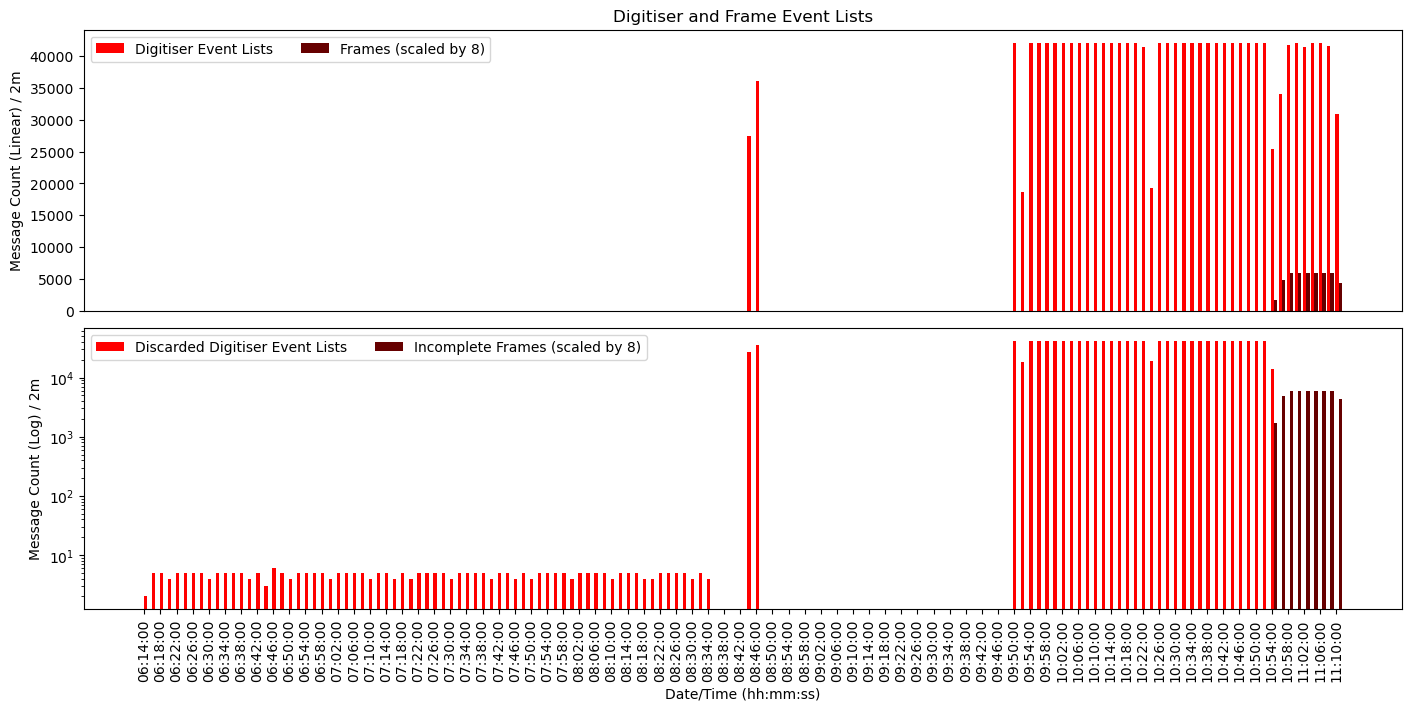

In [ ]:
#Fine Grain Analysis
format = "hh:mm:ss"
bin_width = "2m"
index_datetime = "2025-04-04"
time_from = "06:15:06.0"
time_to = "20:00:00.0"
namespace = "hifi_1"
#namespace = "pipeline-musr"
index = f"jaeger-span-{index_datetime}*"

req_body = RequestBody(namespace) \
    .with_range(f"{index_datetime}T{time_from}Z", f"{index_datetime}T{time_to}Z")

time_hist = PipelineMessageTimeHistograms()
time_hist.execute_histogram_query(client, index, req_body, bin_width, format)

#frame_result = ts.get_frame_children_by_run(client, "jaeger-span*" , "hifi_1", time_from, time_to)
#run_result = ts.get_runs(client, f"jaeger-span*" , "hifi_1", time_from, time_to)

#processed_runs = ts.process_runs(frame_result, run_result)

hist_count_results(time_hist, None, format, bin_width, 7)